In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

1.Data

In [9]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

check data

In [10]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

[6]


<function matplotlib.pyplot.show(close=None, block=None)>

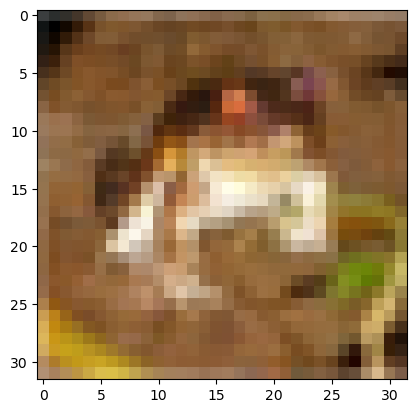

In [11]:
i=0
print(y_train[i])
plt.imshow(x_train[i])
plt.show

Preprocessing

In [12]:
x_train=x_train/255.0
x_test=x_test/255.0

Build Model

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D,AveragePooling2D

keras.backend.clear_session()
np.random.seed(1)
tf.random.set_seed(1)

In [30]:
model=Sequential([
    Conv2D(filters=30,kernel_size=(4,4),strides=(1,1),padding='valid',
          activation='relu',input_shape=(32,32,3)),
    Dropout(rate=0.25),
    MaxPooling2D(pool_size=(2,2),padding='valid'),
    
    Conv2D(filters=60,kernel_size=3,strides=2,padding='same',
          activation='relu'),
    Dropout(rate=0.25),
    MaxPooling2D(pool_size=2,padding='same'),
    
    Flatten(),
    Dropout(rate=0.25),
    Dense(1024,activation='relu'),
    Dropout(rate=0.25),
    Dense(10,activation='softmax')
])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 29, 29, 30)        1470      
                                                                 
 dropout_4 (Dropout)         (None, 29, 29, 30)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 30)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 60)          16260     
                                                                 
 dropout_5 (Dropout)         (None, 7, 7, 60)          0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 4, 60)          0         
 g2D)                                                 

In [32]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',metrics=['accuracy'])

In [35]:
train=model.fit(x_train,y_train,validation_split=0.2,epochs=10,batch_size=128,verbose=1)

Epoch 1/10
313/313 [==============================] - 16s 51ms/step - loss: 1.6257 - accuracy: 0.4110 - val_loss: 1.4308 - val_accuracy: 0.5258
Epoch 2/10
313/313 [==============================] - 17s 54ms/step - loss: 1.3177 - accuracy: 0.5269 - val_loss: 1.2834 - val_accuracy: 0.5786
Epoch 3/10
313/313 [==============================] - 16s 51ms/step - loss: 1.1920 - accuracy: 0.5755 - val_loss: 1.1649 - val_accuracy: 0.6197
Epoch 4/10
313/313 [==============================] - 15s 49ms/step - loss: 1.1149 - accuracy: 0.6044 - val_loss: 1.1460 - val_accuracy: 0.6129
Epoch 5/10
313/313 [==============================] - 15s 48ms/step - loss: 1.0376 - accuracy: 0.6344 - val_loss: 1.0289 - val_accuracy: 0.6591
Epoch 6/10
313/313 [==============================] - 16s 51ms/step - loss: 0.9792 - accuracy: 0.6526 - val_loss: 1.0305 - val_accuracy: 0.6522
Epoch 7/10
313/313 [==============================] - 16s 50ms/step - loss: 0.9239 - accuracy: 0.6746 - val_loss: 0.9732 - val_accuracy:

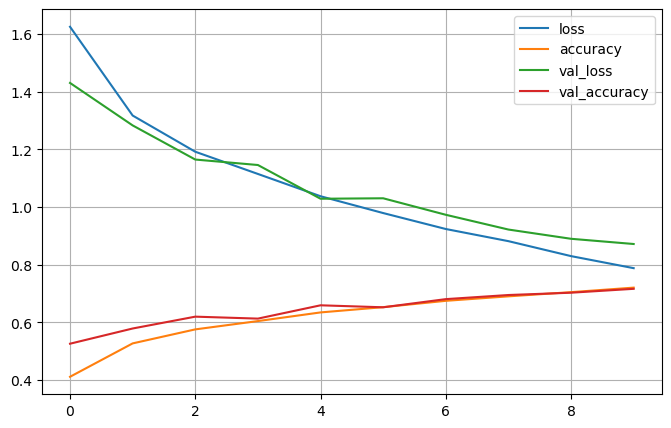

In [36]:
pd.DataFrame(train.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [37]:
model.evaluate(x_test,y_test,verbose=0)

[0.8744276165962219, 0.7084000110626221]

In [38]:
y_proba=model.predict(x_test)
y_proba[:3].round(2)


313/313 [==============================] - 1s 4ms/step


array([[0.  , 0.01, 0.03, 0.6 , 0.04, 0.17, 0.07, 0.01, 0.05, 0.01],
       [0.01, 0.32, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.66, 0.  ],
       [0.25, 0.11, 0.01, 0.01, 0.01, 0.  , 0.  , 0.01, 0.46, 0.13]],
      dtype=float32)

In [39]:
y_pred=np.argmax(y_proba,axis=1)
y_pred[:3]

array([3, 8, 8])

In [40]:
y_test[:3]

array([[3],
       [8],
       [8]], dtype=uint8)

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[772,  17,  61,  11,  24,   1,  17,  12,  55,  30],
       [ 27, 827,   7,   8,   5,   3,  13,   3,  24,  83],
       [ 64,   4, 632,  43, 104,  24,  78,  28,  13,  10],
       [ 15,  11, 111, 486, 107, 107,  99,  30,  12,  22],
       [ 20,   5,  94,  41, 700,  11,  62,  58,   8,   1],
       [ 10,   1, 103, 238,  74, 466,  45,  49,  10,   4],
       [  3,   4,  44,  39,  29,   9, 854,   6,   8,   4],
       [ 12,   7,  47,  53,  74,  27,  12, 759,   0,   9],
       [ 59,  35,  19,  12,  12,   3,   8,   5, 825,  22],
       [ 35, 102,  11,  13,  14,   4,  15,  11,  32, 763]])